`Author: ` `Muhammad Haroon ul Hasnain`
`Date: ` `2024-04-18`


## Titanic - EDA to Prediction(DieTanic)

I am doing the EDA on the Titanic dataset and I will also make a prediction on the survival of the passengers in the next notebook. I will be using the following libraries for the analysis:

- numpy, pandas for data manipulation, and analysis, and seaborn, matplotlib, plotly for visualization.
 
I will explore the insights of the data and will try to find the answers to the following questions:
1- Who were the passengers on the Titanic
2- What deck were the passengers on and how does that relate to their class
3- Where did the passengers come from
4- Who was alone and who was with family
5- What factors helped someone survive the sinking

#### Data Dictionary
- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex Male, Female	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
# import Data
df = sns.load_dataset('titanic')

In [ ]:
# bigger picture of the data
# Data Composition, columns, rows,
# Data Distribution, shape of the data
# Data Comparison, comparison of the data
# Relationship, what is the relation of the data with each other

In [ ]:
# Data Composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


This dataset has 6 numerical columns, 7 categorical/object columns, and 2 binary columns.

In this dataset we have 891 rows and 15 columns 

There are some missing values in the dataset which I will handle in this notebook.

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


After having a look at the data, I found that the some columns need to be converted to the correct data type.

In [ ]:
# this dataset has 7 numerical columns, in these numerical columns 5 discrete and 2 continous columns.
# it has 8 categorical columns, in these categorical columns 2 rodinal and 6 nominal columns.

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

After seeing the unique values of each column, I found that age and fare columns have a large number of unique values. 

Its obvious that age and fare are continuous variables and it need we can do binning on these columns.

In [ ]:
print(df['survived'].unique())
print(df['pclass'].unique())
print(df['sex'].unique())
print(df['sibsp'].unique()) # make it nominal with 2 categories (single vs family)
print(df['parch'].unique()) # make it nominal wirh 2 categories (paresnt vs children)
print(df['embarked'].unique())
print(df['class'].unique())
print(df['who'].unique())
print(df['deck'].unique())
print(df['embark_town'].unique())

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
['man' 'woman' 'child']
[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In this dataset set, the age column has 177 (`19.87%`) missing values, the deck column has 688 (`77.22%`) missing values, and the embarked or embark_town column has 2 (`0.22%`) missing values. So, we will handle these missing values.

<Axes: xlabel='deck'>

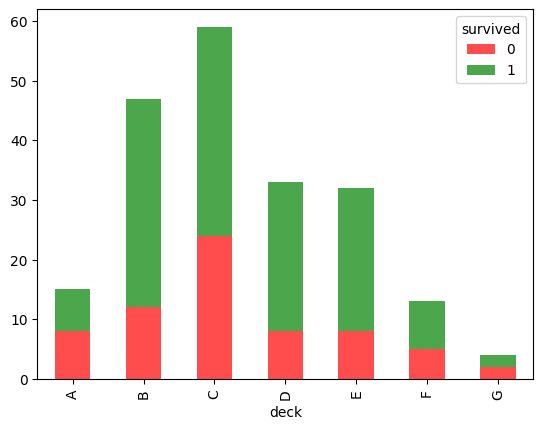

In [ ]:
#Checking the survived with the relation of deck column
# df.groupby('deck')['survived'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True')
df.groupby('deck')['survived'].value_counts().unstack().plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)

In [ ]:
df.groupby('deck')['survived'].value_counts()

deck  survived
A     0            8
      1            7
B     1           35
      0           12
C     1           35
      0           24
D     1           25
      0            8
E     1           24
      0            8
F     1            8
      0            5
G     0            2
      1            2
Name: count, dtype: int64

We analyse that the survived column with the relation of deck column, we found that there are many missing values and which are given as deck number, these shows that 136 passengers are survived as per the deck number, most of the survived passengers are from deck B, C, D, and E, respectively 35, 35, 25, 24. These are the top 4 decks of the given values, but the deck column has 688 missing values, so we can't say that these are the top 4 decks. 

In [ ]:
df.drop('deck', axis=1, inplace=True)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

#### Imputing the missing values

- For the age column, I will impute the missing values with the IterativeImputer method, which is a multivariate imputer that estimates each feature from all the others. It is very useful when we have missing values in multiple columns.
- For the Embarked and Embark_town columns, I will impute the missing values with the most frequent value of the column.

In [ ]:
# these are the methods to impute the missing values
# missing values imputation are imputed by mean, median, and mode
# can impute using interpolate(method=linear)
# can use for imputation KNN Imputer (imputer = KNNImputer(n_neighbours=5) --> column = imputer.fit_transform([[column]]))
# using multivariate

In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [ ]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [ ]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True


In [ ]:
# using multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
df['age'] = imputer.fit_transform(df[['age']])

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
print(df['survived'].value_counts() / len(df['survived'] * 100))
print(df['sex'].value_counts() / len(df['sex'] * 100))

survived
0    0.616162
1    0.383838
Name: count, dtype: float64
sex
male      0.647587
female    0.352413
Name: count, dtype: float64


In [ ]:
print(df.groupby('survived')['sex'].value_counts() / len(df['sex'] * 100))

survived  sex   
0         male      0.525253
          female    0.090909
1         female    0.261504
          male      0.122334
Name: count, dtype: float64


The survived percentage is 38.38% and the not survived percentage is 61.62%. This shows that the number of passengers who survived is less than the number of passengers who did not survive. 
The percentage of male passengers is 64.76% and the percentage of female passengers is 35.24%. 
The percentage of survived female passengers is 26.15% and the percentage of survived male passengers is 12.23%.
So, we can say that the survival rate of the female passengers is higher than the male passengers.

In [ ]:
df[df['who']=='child']['age'].max()

15.0

In this dataset the children are considered as the passengers whose age is less than equal to 15 years. 

In [ ]:
# age groups
bins = [0,5, 10, 15, 18, 40, 80]
labels = ['0-5', '6-10', '11-15', '16-18', '19-40', '41-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [ ]:
df['age_group'].value_counts()

age_group
19-40    602
41-80    150
16-18     56
0-5       44
6-10      20
11-15     19
Name: count, dtype: int64

<Axes: xlabel='age_group'>

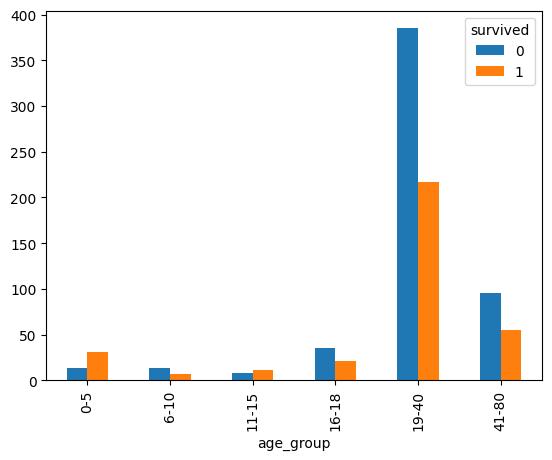

In [ ]:
df.groupby('age_group')['survived'].value_counts().unstack().plot(kind='bar')

The age_group and Survived columns analysis shows that most of the survived passengers' age were 19-40 years old, and also, most of the not survived passengers' age is alos 19 to 40 years old. 

In [ ]:
df.groupby('sex')['age_group'].value_counts().unstack()

age_group,0-5,6-10,11-15,16-18,19-40,41-80
sex,,,,,,
female,21,10,12,25,198,48
male,23,10,7,31,404,102


In [ ]:
df.groupby('who')['age_group'].value_counts().unstack()

age_group,0-5,6-10,11-15,16-18,19-40,41-80
who,,,,,,
child,44,20,19,0,0,0
man,0,0,0,31,404,102
woman,0,0,0,25,198,48


In [ ]:
df.groupby('who')[['age_group', 'class']].value_counts().unstack()

class            First  Second  Third
who   age_group                      
child 0-5            3      13     28
      6-10           0       4     16
      11-15          3       2     14
      16-18          0       0      0
      19-40          0       0      0
      41-80          0       0      0
man   0-5            0       0      0
      6-10           0       0      0
      11-15          0       0      0
      16-18          2       6     23
      19-40         67      72    265
      41-80         50      21     31
woman 0-5            0       0      0
      6-10           0       0      0
      11-15          0       0      0
      16-18          8       4     13
      19-40         57      49     92
      41-80         26      13      9

In [ ]:
df.groupby('survived')['class'].value_counts().unstack()

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


The dataset also shows that most of the survived passengers were from class first, that are (`136`)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_group'],
      dtype='object')

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations of Statistical summary

The 5 number summary of the age column shows that the minimum age of the passengers is 0.42 years, the maximum age is 80 years, the median age is 28 years, and the mean age is 29.70 years. The 25th percentile of the age column is 20 years, and the 75th percentile of the age column is 38 years. The standard deviation of the age column is 14.53 years.
The statistical summary also shows that the minimum fare is 0, and maximum is 512.33 pounds. The median fare is 14.45 pounds, and the mean fare is 32.20 pounds. The 25th percentile of the fare column is 7.91 pounds, and the 75th percentile of the fare column is 31 pounds. The standard deviation of the fare column is 49.69 pounds.

<Axes: xlabel='age', ylabel='fare'>

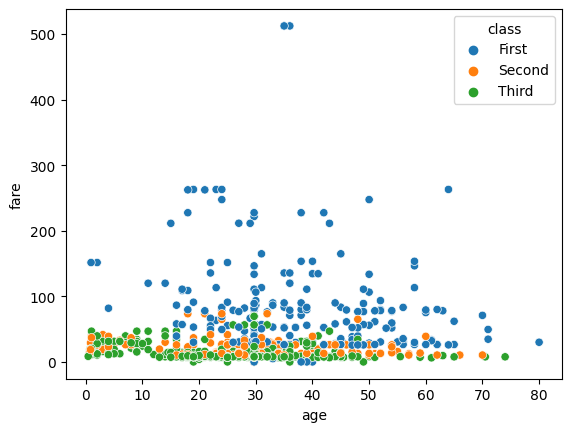

In [ ]:
sns.scatterplot(data=df, x='age', y='fare', hue='class')

This scatter plot shows that the most of the passengers are from class 3, and the least number of passengers are from class 2. The passengers from class 1 are also less than the passengers from class 3. It also shows that most fare paid by the class 1 passengers. 

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='who')
fig.show()

In [ ]:
# first have to check missing values and deal with them, 
# then check the outliers and deal with them,

<Axes: xlabel='fare', ylabel='Count'>

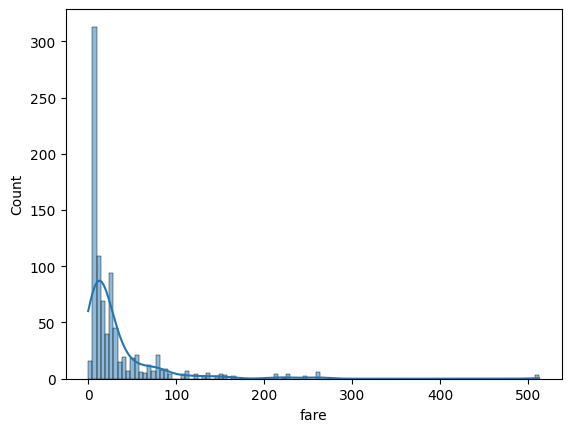

In [ ]:
# distribution of the data
sns.histplot(df, x='fare', kde=True)

We found that the distribution of the fare column is right-skewed, so we used shapiro wilk test to check the normality of the fare column, So that, it is not normally distributed.

In [ ]:
# shapiro wilk test

from scipy.stats import shapiro

stat, p = shapiro(df['fare'])
# print('Statistics:%.3f, p=%.3f' % (stat,p))
print('Statistics: ', stat)
print('p-value: ', p)

# inperpretation
# H0: data is normally distributed
# H1: data is not normally distributed
alpha = 0.05
if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Statistics:  0.5218917727470398
p-value:  1.0789998175301091e-43
Data is not normally distributed


Then we used the logrithmic transformation on the fare column to make it normally distributed, then again checked wusing shairo wilk test and found the data normally distributed. 

In [ ]:
# df['fare'] = np.log(df['fare'])
stat, p = shapiro(df['fare'])
print('Statistics: %.3f, p: %.3f' % (stat,p))

alpha = 0.05
if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Statistics: nan, p: 1.000
Data is normally distributed


c:\Users\Muhammad Haroon\.conda\envs\python_eda\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  age_group    891 non-null    category
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.5+ KB


c:\Users\Muhammad Haroon\.conda\envs\python_eda\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract

c:\Users\Muhammad Haroon\.conda\envs\python_eda\Lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

c:\Users\Muhammad Haroon\.conda\envs\python_eda\Lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



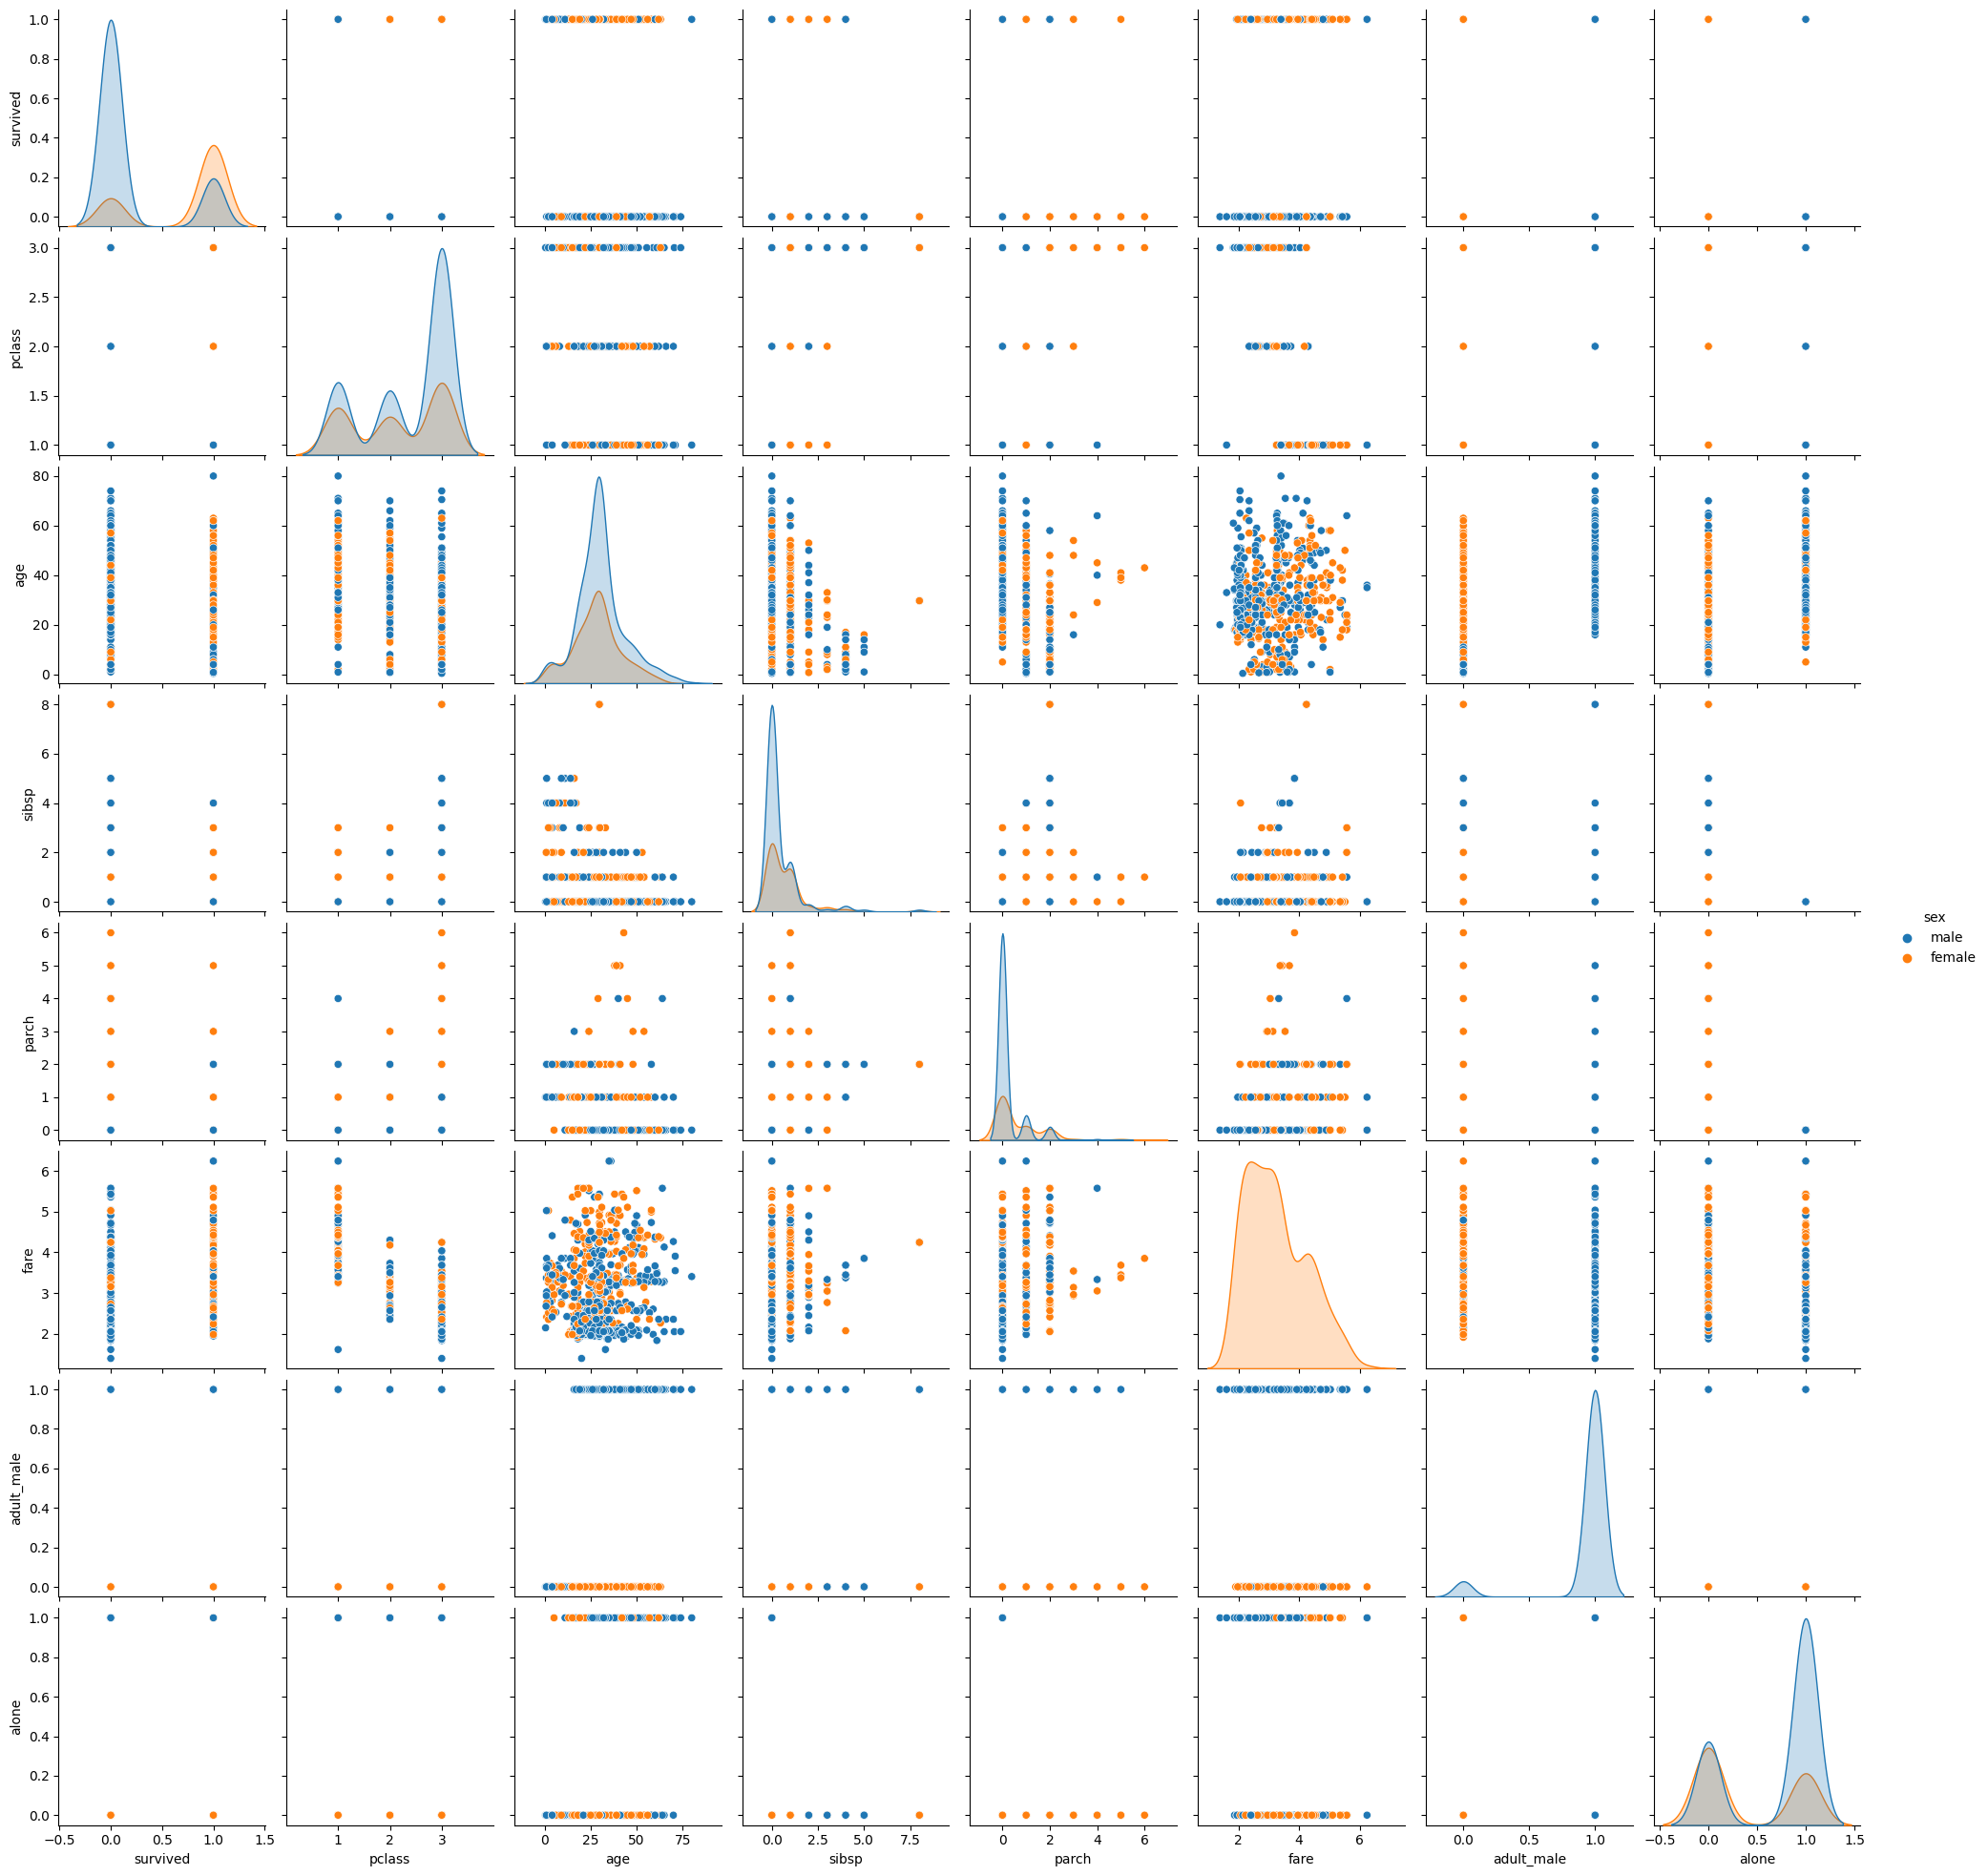

In [ ]:
sns.pairplot(df, hue='sex')

The pairplot shows the overview of the whole dataset. It shows the relationship between each pair of columns in the dataset. It shows the relationship between the numerical columns of the dataset. It shows the relationship between the age, fare, and survived columns.

<Axes: >

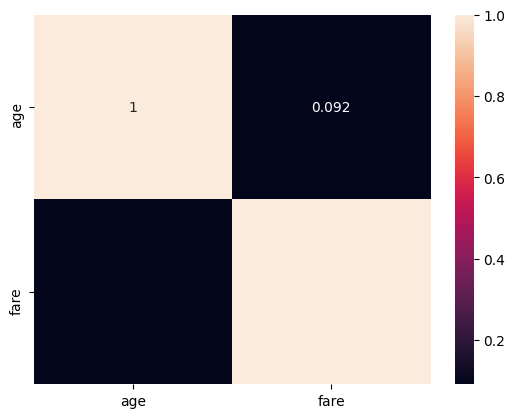

In [ ]:
corr = df[['age', 'fare']].corr()
sns.heatmap(corr, annot=True)

<Axes: >

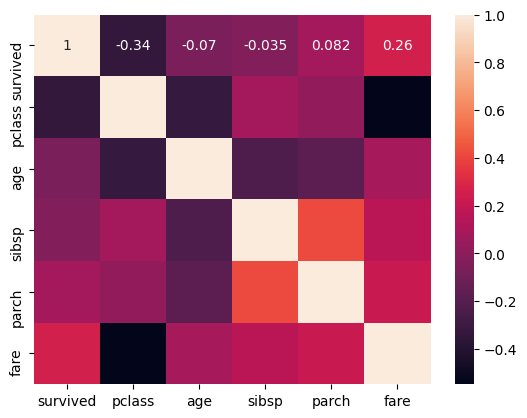

In [ ]:
df_heatmap = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(df_heatmap.corr(), annot=True)

The heatmap shows the positive relationship between fare and survived, and also shows positive relationship between fare and age. 

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_group'],
      dtype='object')

In [ ]:
df[df['alone']].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,19-40
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,19-40
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,19-40
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True,41-80
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,Southampton,yes,True,41-80


In [ ]:
df_not_alone = df[df['alone']==False].value_counts()
df_not_alone

survived  pclass  sex     age        sibsp  parch  fare     embarked  class   who    adult_male  embark_town  alive  alone  age_group
0         3       male    29.699118  8      2      69.5500  S         Third   man    True        Southampton  no     False  19-40        4
1         3       female  29.699118  1      0      15.5000  Q         Third   woman  False       Queenstown   yes    False  19-40        3
0         3       female  29.699118  8      2      69.5500  S         Third   woman  False       Southampton  no     False  19-40        3
                                     3      1      25.4667  S         Third   woman  False       Southampton  no     False  19-40        3
1         2       female  29.000000  1      0      26.0000  S         Second  woman  False       Southampton  yes    False  19-40        2
                                                                                                                                        ..
0         3       male    8.0000